In [ ]:
! nvidia-smi

/bin/bash: nvidia-smi: command not found


## Cloning and Building Darknet

In [ ]:
! git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15530, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15530 (delta 5), reused 13 (delta 4), pack-reused 15514
Receiving objects: 100% (15530/15530), 14.21 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (10417/10417), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
! head Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## Compile YOLO

In [ ]:
# make darknet (build)
! make

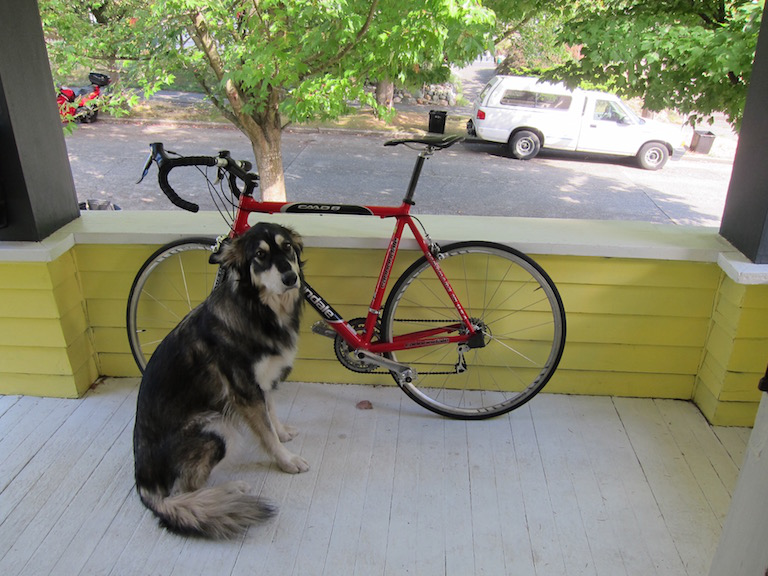

In [ ]:
from PIL import Image
Image.open('./data/dog.jpg')

In [ ]:
! wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2023-07-05 06:45:03--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  42.6MB/s    in 0.8s    

2023-07-05 06:45:04 (42.6 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
! ./darknet detect cfg/yolov3-tiny.cfg ./yolov3-tiny.weights data/dog.jpg

/bin/bash: ./darknet: Is a directory


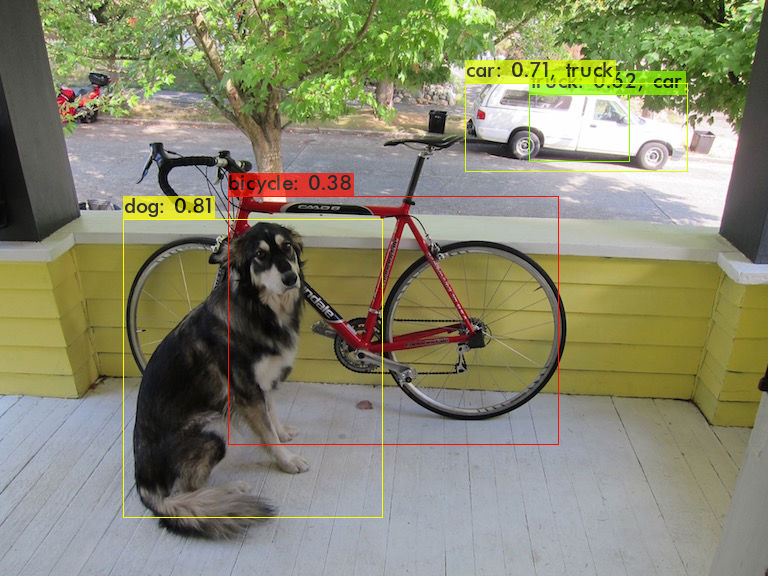

In [ ]:
from PIL import Image
Image.open('predictions.jpg')

## Check Custom Dataset

https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/dataset/face_mask.zip" /content/

In [ ]:
%cd /content
! unzip /content/face_mask.zip > data_unzip.log

/content
replace annotations/maksssksksss0.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! cat /content/annotations/maksssksksss358.xml


<annotation>
    <folder>images</folder>
    <filename>maksssksksss358.png</filename>
    <size>
        <width>400</width>
        <height>300</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>91</xmin>
            <ymin>64</ymin>
            <xmax>126</xmax>
            <ymax>106</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>179</xmin>
            <ymin>65</ymin>
            <xmax>221</xmax>
            <ymax>109</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</trunca

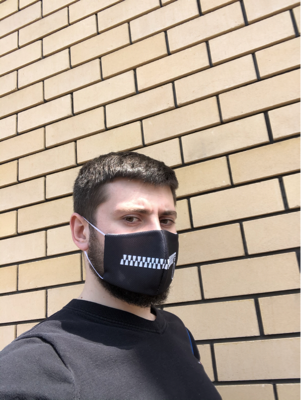

In [ ]:
from PIL import Image
img = Image.open('/content/images/maksssksksss845.png')
img

In [ ]:
! rm -rf /content/yolo
! mkdir /content/yolo

In [ ]:
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'with_mask': 2, 'without_mask': 1, 'mask_weared_incorrect': 0}
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.png')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [ ]:
import os
labelpath = '/content/annotations/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'
ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

In [ ]:
! cat /content/yolo/1.txt

2 0.055 0.02564102564102564 0.055 0.04395604395604396
2 0.32625 0.0641025641025641 0.0525 0.07692307692307693
2 0.25875 0.17399267399267399 0.0525 0.08424908424908426
1 0.425 0.06776556776556776 0.045 0.0695970695970696
2 0.3475 0.19047619047619047 0.065 0.10989010989010989
2 0.065 0.6996336996336996 0.12 0.3076923076923077
1 0.5925 0.21062271062271062 0.035 0.0695970695970696
1 0.55375 0.26556776556776557 0.0575 0.08424908424908426
2 0.49625 0.42124542124542125 0.0725 0.11721611721611722
2 0.69 0.14102564102564102 0.055 0.0989010989010989
2 0.83 0.19963369963369965 0.045 0.08424908424908426
2 0.78125 0.47985347985347987 0.0725 0.10256410256410256
2 0.93625 0.3553113553113553 0.0575 0.08058608058608059

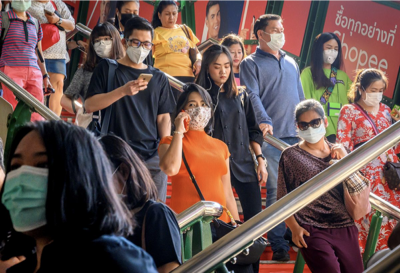

In [ ]:
from PIL import Image
Image.open('/content/yolo/1.png')

## Prepare Training Set & Testing Set

In [ ]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [ ]:
import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
n_train = int(len(datasets) * 0.8)
print ("n_train:", n_train)
print ("n_test:", len(datasets) - n_train)
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[:n_train]))
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[n_train:]))

n_train: 682
n_test: 171


## Copy Params Files

In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/dataset/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/MyDrive/Colab Notebooks/dataset/cfg_mask/obj.names" cfg_mask/

In [ ]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [ ]:
! head /content/cfg_mask/obj.names

mask_weared_incorrect
without_mask
with_mask

In [ ]:
! mkdir /content/cfg_mask/weights

## YOLOv3 Architecture

In [ ]:
%%html
<img src='https://miro.medium.com/max/1200/0*3A8U0Hm5IKmRa6hu.png' width="500px" />

## Modify yolov3-tiny.cfg

*   YOLOV3 偵測的濾鏡(filter) 大小為 (C + 5) * B.
  *   B 是每個 Feature Map 可以偵測的Bounding Box 數量
  * 5 是 Bounding Box 的 x,y,w,h 以及
 Confidence
  * C 是類別數量
* filters=(classes + 5) * 3 # 24
* classes=3

In [ ]:
! mkdir -p cfg_mask
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/cfg_mask/

In [ ]:
! sed -n -e 3p -e 4p -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

batch=1
subdivisions=1
filters=255
classes=80
filters=255
classes=80


In [ ]:
! sed -i '3s/1/64/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '4s/1/2/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '127s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '135s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '171s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '177s/80/3/' /content/cfg_mask/yolov3-tiny.cfg

In [ ]:
! sed -n -e 3p -e 4p -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

batch=64
subdivisions=2
filters=24
classes=3
filters=24
classes=3


## Training Model

In [ ]:
# cp weight
! cp "/content/drive/MyDrive/Colab Notebooks/dataset/darknet53.conv.74" /content/cfg_mask/

In [ ]:
! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/darknet53.conv.74 -dont_show

## Inference

In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/dataset/yolov3-tiny_3000.weights" /content/cfg_mask/

In [ ]:
!sed -i 's/batch=64/batch=1/' /content/cfg_mask/yolov3-tiny.cfg
!sed -i 's/subdivisions=2/subdivisions=1/' /content/cfg_mask/yolov3-tiny.cfg
! head /content/cfg_mask/yolov3-tiny.cfg

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=1
# subdivisions=1
width=416
height=416
channels=3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

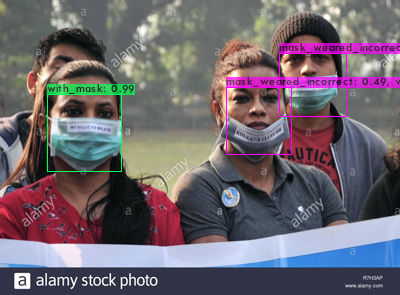

In [ ]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/yolov3-tiny_3000.weights /content/images/maksssksksss29.png -dont_show

from PIL import Image
Image.open('/content/darknet/predictions.jpg')